2025-05-17 16:27:44.792222: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747499264.986028      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747499265.040710      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1747499278.027850      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


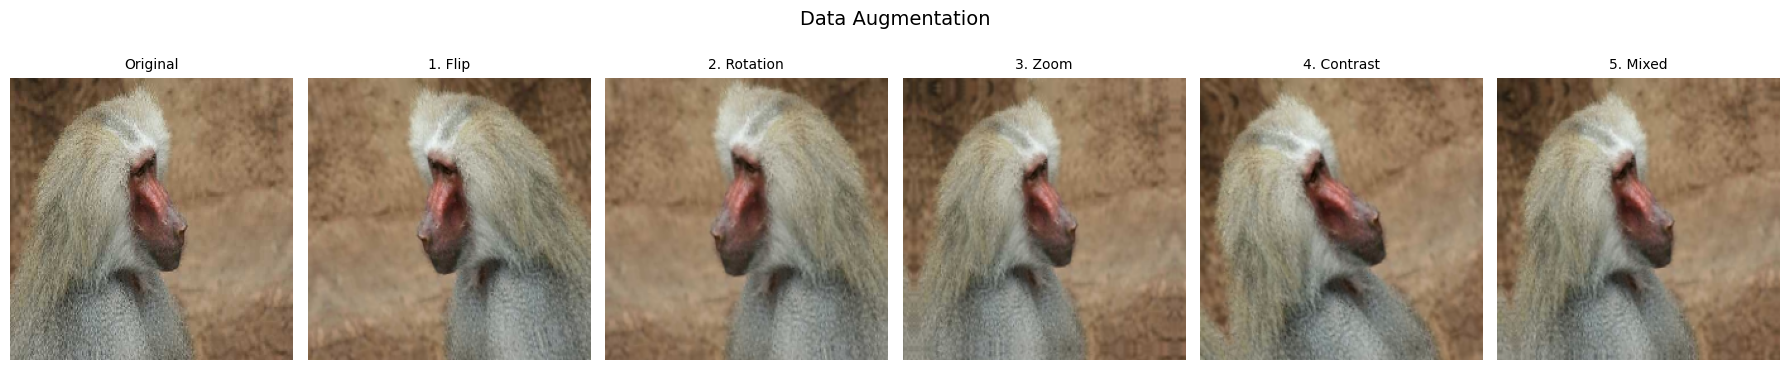

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

# Define augmentation pipeline (based on Section V of the paper)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),         # 1. Flip
    tf.keras.layers.RandomRotation(0.1),              # 2. Rotation
    tf.keras.layers.RandomZoom(0.1),                  # 3. Zoom
    tf.keras.layers.RandomContrast(0.1),              # 4. Contrast
], name="data_augmentation")

# Function to load and preprocess a sample image
def load_sample_image(img_path, target_size=(224, 224)):
    img = tf.keras.utils.load_img(img_path, target_size=target_size)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = img_array / 255.0  # Normalize to [0, 1]
    return img_array

# Plot original image with 5 augmentations and label their type
def plot_augmented_images(img_array, title="Data Augmentation"):
    augmentation_labels = [
        "Original",
        "1. Flip",
        "2. Rotation",
        "3. Zoom",
        "4. Contrast",
        "5. Mixed"  # Since all are applied together, this is a mixed effect
    ]
    
    plt.figure(figsize=(18, 4))  # Wider layout for 1-row display
    for i in range(6):
        ax = plt.subplot(1, 6, i + 1)
        if i == 0:
            plt.imshow(img_array)
        else:
            augmented = data_augmentation(tf.expand_dims(img_array, axis=0), training=True)
            plt.imshow(augmented[0].numpy())
        plt.title(augmentation_labels[i], fontsize=10)
        plt.axis("off")
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()


# Load sample image path (example: 'n0' class directory)
sample_image_dir = Path("/kaggle/input/monkey5/MonkeyDataSet - Copy/testing/testing/n0")
sample_files = list(sample_image_dir.glob("*.jpg"))

# Ensure the directory is not empty
if sample_files:
    sample_image = load_sample_image(sample_files[0])
    plot_augmented_images(sample_image)
else:
    print("No image files found in the specified directory.")


Loading training dataset...
Found 9 classes: ['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8']
Processing class: n8 (index: 8)
  Processed 788 images for class n8
Processing class: n6 (index: 6)
  Processed 758 images for class n6
Processing class: n7 (index: 7)
  Processed 781 images for class n7
Processing class: n1 (index: 1)
  Processed 786 images for class n1
Processing class: n0 (index: 0)
  Processed 767 images for class n0
Processing class: n2 (index: 2)
  Processed 768 images for class n2
Processing class: n5 (index: 5)
  Processed 791 images for class n5
Processing class: n4 (index: 4)
  Processed 772 images for class n4
Processing class: n3 (index: 3)
  Processed 785 images for class n3
Total dataset size: 6996 images
Loading test dataset...
Found 9 classes: ['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8']
Processing class: n8 (index: 8)
  Processed 375 images for class n8
Processing class: n6 (index: 6)
  Processed 410 images for class n6
Processing class: n7 (in

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'pretrained_vi_t', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "pretrained_vi_t"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25


I0000 00:00:1747472873.756435      91 service.cc:148] XLA service 0x13fc31e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747472873.757323      91 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1747472874.587933      91 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1747472876.905781      91 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.5747 - loss: 10.8450Epoch 1: Loss = 9.9448, Accuracy = 0.7683
197/197 ━━━━━━━━━━━━━━━━━━━━ 63s 247ms/step - accuracy: 0.5756 - loss: 10.8404 - val_accuracy: 0.6329 - val_loss: 10.0537
Epoch 2/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9110 - loss: 8.9328Epoch 2: Loss = 8.8116, Accuracy = 0.9130
197/197 ━━━━━━━━━━━━━━━━━━━━ 40s 203ms/step - accuracy: 0.9110 - loss: 8.9322 - val_accuracy: 0.7400 - val_loss: 9.2230
Epoch 3/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9174 - loss: 8.5796Epoch 3: Loss = 8.4753, Accuracy = 0.9172
197/197 ━━━━━━━━━━━━━━━━━━━━ 40s 203ms/step - accuracy: 0.9174 - loss: 8.5791 - val_accuracy: 0.8043 - val_loss: 8.4479
Epoch 4/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9229 - loss: 7.8171Epoch 4: Loss = 7.5701, Accuracy = 0.9239
197/197 ━━━━━━━━━━━━━━━━━━━━ 40s 203ms/step - accuracy: 0.9229 - loss: 7.8158 - val_accuracy: 0.8257 - val_loss: 7.4433
Epoch 5/25
1

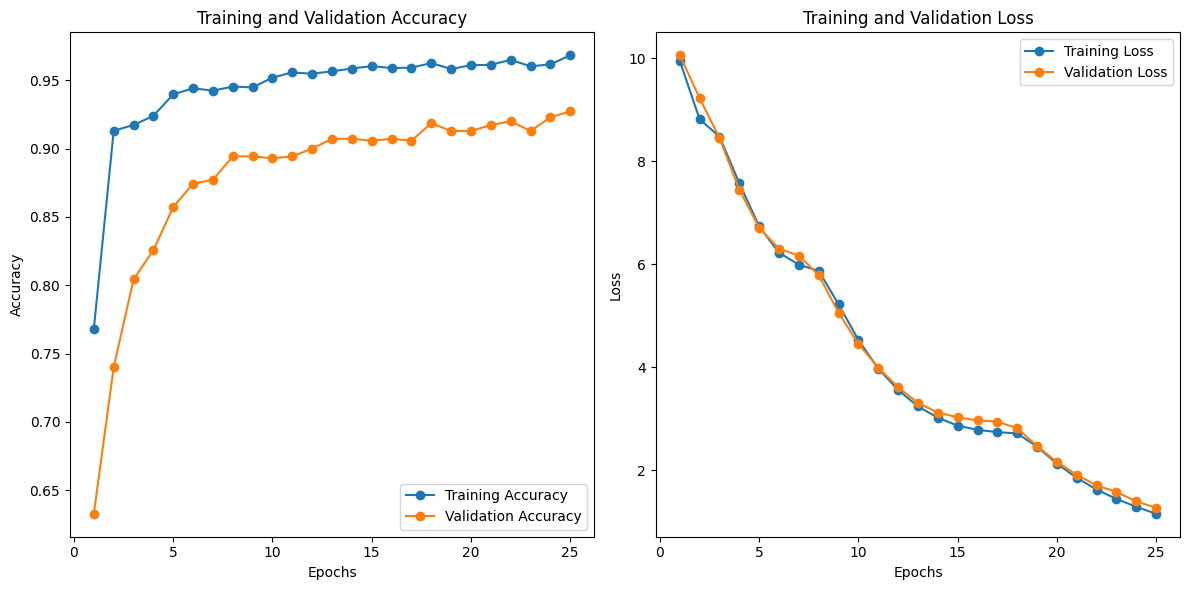


=== Training Run 2/3 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'pretrained_vi_t_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "pretrained_vi_t_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.6052 - loss: 10.6751Epoch 1: Loss = 9.8881, Accuracy = 0.7870
197/197 ━━━━━━━━━━━━━━━━━━━━ 60s 240ms/step - accuracy: 0.6061 - loss: 10.6712 - val_accuracy: 0.4814 - val_loss: 10.3456
Epoch 2/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9055 - loss: 8.9543Epoch 2: Loss = 8.8220, Accuracy = 0.9150
197/197 ━━━━━━━━━━━━━━━━━━━━ 40s 203ms/step - accuracy: 0.9056 - loss: 8.9537 - val_accuracy: 0.7000 - val_loss: 9.2944
Epoch 3/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9138 - loss: 8.6330Epoch 3: Loss = 8.5207, Accuracy = 0.9157
197/197 ━━━━━━━━━━━━━━━━━━━━ 40s 203ms/step - accuracy: 0.9138 - loss: 8.6324 - val_accuracy: 0.8086 - val_loss: 8.4012
Epoch 4/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9266 - loss: 7.8545Epoch 4: Loss = 7.6061, Accuracy = 0.9341
197/197 ━━━━━━━━━━━━━━━━━━━━ 40s 203ms/step - accuracy: 0.9267 - loss: 7.8533 - val_accuracy: 0.8871 - val_loss: 7.3389
E

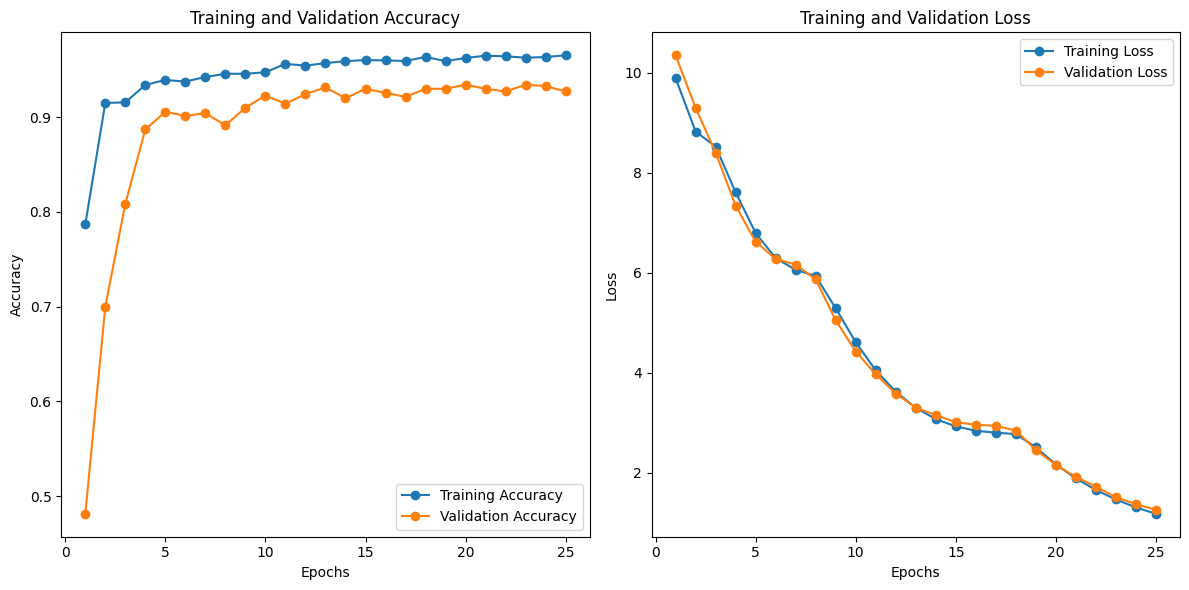


=== Training Run 3/3 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'pretrained_vi_t_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "pretrained_vi_t_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.6201 - loss: 10.6616Epoch 1: Loss = 9.8757, Accuracy = 0.7943
197/197 ━━━━━━━━━━━━━━━━━━━━ 60s 239ms/step - accuracy: 0.6209 - loss: 10.6576 - val_accuracy: 0.7371 - val_loss: 9.7417
Epoch 2/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9078 - loss: 8.9354Epoch 2: Loss = 8.8121, Accuracy = 0.9117
197/197 ━━━━━━━━━━━━━━━━━━━━ 40s 203ms/step - accuracy: 0.9078 - loss: 8.9348 - val_accuracy: 0.8371 - val_loss: 8.9049
Epoch 3/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9160 - loss: 8.5728Epoch 3: Loss = 8.4656, Accuracy = 0.9233
197/197 ━━━━━━━━━━━━━━━━━━━━ 40s 202ms/step - accuracy: 0.9160 - loss: 8.5722 - val_accuracy: 0.8743 - val_loss: 8.2207
Epoch 4/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9279 - loss: 7.7980Epoch 4: Loss = 7.5600, Accuracy = 0.9279
197/197 ━━━━━━━━━━━━━━━━━━━━ 40s 203ms/step - accuracy: 0.9279 - loss: 7.7968 - val_accuracy: 0.8900 - val_loss: 7.2120
Ep

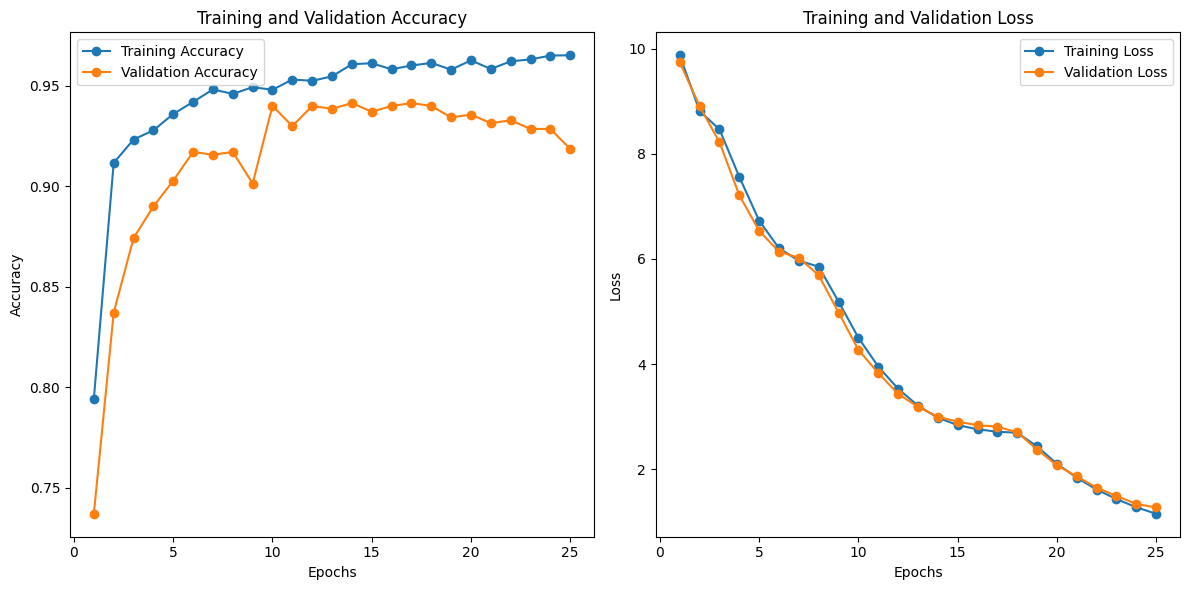


=== Repeated Run Summary ===
Average Test Accuracy: 0.9535
Standard Deviation: 0.0007

Final evaluation with best-performing model is recommended separately.


In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import tensorflow_hub as hub
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.model_selection import StratifiedKFold
import os

# ============== 1. Helper Functions ==============

def preprocess_data(image_path, target_size=(224, 224)):
    """Preprocess a single image for model input."""
    img = tf.keras.utils.load_img(image_path, target_size=target_size)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = img_array / 255.0  # Normalize to [0, 1]
    return img_array

def prepare_dataset(folder_path, target_size=(224, 224)):
    folder_path = Path(folder_path)
    images = []
    labels = []
    class_names = sorted([entry.name for entry in folder_path.iterdir() if entry.is_dir()])
    
    print(f"Found {len(class_names)} classes: {class_names}")

    for folder in folder_path.iterdir():
        if folder.is_dir():
            class_name = folder.name
            class_idx = class_names.index(class_name)
            print(f"Processing class: {class_name} (index: {class_idx})")
            
            file_count = 0
            for img_path in folder.iterdir():
                if img_path.suffix.lower() in ['.jpg', '.jpeg', '.png']:
                    try:
                        img_array = preprocess_data(img_path, target_size)
                        images.append(img_array)
                        labels.append(class_idx)
                        file_count += 1
                    except Exception as e:
                        print(f"Skipping file {img_path} due to error: {e}")
            
            print(f"  Processed {file_count} images for class {class_name}")

    print(f"Total dataset size: {len(images)} images")
    return np.array(images), to_categorical(labels, num_classes=len(class_names)), class_names

def plot_training_history(history):
    """Plot training and validation accuracy and loss over epochs."""
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy', marker='o')
    plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss', marker='o')
    plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# ============== 2. Model Definition ==============

def weighted_categorical_crossentropy(weights):
    """Custom weighted categorical cross-entropy loss."""
    def loss(y_true, y_pred):
        weights_tensor = tf.constant(weights, dtype=tf.float32)
        weights_tensor = tf.gather(weights_tensor, tf.argmax(y_true, axis=-1))
        return tf.reduce_mean(weights_tensor * CategoricalCrossentropy()(y_true, y_pred))
    return loss

class PretrainedViT(tf.keras.Model):
    """Custom Vision Transformer model using TensorFlow Hub."""
    def __init__(self, num_classes, vit_model_url):
        super().__init__()
        self.data_augmentation = tf.keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.1),
            layers.RandomZoom(0.1),
            layers.RandomContrast(0.1),
        ])
        self.vit_model = hub.KerasLayer(vit_model_url, trainable=False)
        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01))
        self.dropout = layers.Dropout(0.5)
        self.fc2 = layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01))
        self.classifier = layers.Dense(num_classes, activation="softmax")

    def call(self, inputs, training=False):
        x = self.data_augmentation(inputs, training=training)
        x = self.vit_model(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.dropout(x, training=training)
        x = self.fc2(x)
        return self.classifier(x)

def create_and_compile_model(input_shape, num_classes, class_weights):
    """Initialize and compile the ViT-based model."""
    vit_model_url = "https://tfhub.dev/sayakpaul/vit_b16_fe/1"
    model = PretrainedViT(num_classes, vit_model_url)

    # Cosine decay with warm restarts
    lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(
        initial_learning_rate=0.0001,
        first_decay_steps=500,
        t_mul=2.0,
        m_mul=0.9,
        alpha=0.01
    )

    optimizer = tf.keras.optimizers.AdamW(learning_rate=lr_schedule)

    # Custom loss function with class weights
    weights = [class_weights[i] for i in range(len(class_weights))]
    model.compile(
        optimizer=optimizer,
        loss=weighted_categorical_crossentropy(weights),
        metrics=["accuracy"]
    )

    return model

# ============== 3. Callbacks ==============

class DebugCallback(tf.keras.callbacks.Callback):
    """Callback to log loss and accuracy during training."""
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}: Loss = {logs['loss']:.4f}, Accuracy = {logs['accuracy']:.4f}")

# ============== 4. Evaluation Utilities ==============

def evaluate_model(model, X_test, y_test, class_names):
    """Evaluate the model and visualize metrics."""
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    print("\nClassification Report:")
    print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # Add visualization of example predictions
    display_predictions(model, X_test, y_test, class_names, num_examples=5)

def display_predictions(model, X_test, y_test, class_names, num_examples=5):
    """Display example images with their predictions."""
    # Get predictions
    preds = model.predict(X_test)
    pred_classes = np.argmax(preds, axis=1)
    true_classes = np.argmax(y_test, axis=1)
    
    # Randomly select examples
    indices = np.random.choice(range(len(X_test)), min(num_examples, len(X_test)), replace=False)
    
    plt.figure(figsize=(15, 3*num_examples))
    for i, idx in enumerate(indices):
        plt.subplot(num_examples, 1, i+1)
        plt.imshow(X_test[idx])
        
        true_class = class_names[true_classes[idx]]
        pred_class = class_names[pred_classes[idx]]
        confidence = preds[idx][pred_classes[idx]] * 100
        
        title_color = "green" if true_class == pred_class else "red"
        plt.title(f"True: {true_class} | Predicted: {pred_class} ({confidence:.1f}%)", 
                 color=title_color)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# ============== 5. Main Function ==============
def main(train_path, test_path, epochs=25, batch_size=32, num_repeats=3):
    """Repeated training on fixed train/test split to assess reliability."""
    print("Loading training dataset...")
    X_train, y_train, class_names = prepare_dataset(train_path)
    print("Loading test dataset...")
    X_test, y_test, _ = prepare_dataset(test_path)

    input_shape = X_train.shape[1:]
    num_classes = len(class_names)
    y_train_classes = np.argmax(y_train, axis=1)

    # Compute class weights
    class_weights_arr = compute_class_weight(
        class_weight="balanced",
        classes=np.unique(y_train_classes),
        y=y_train_classes
    )
    class_weights = {i: weight for i, weight in enumerate(class_weights_arr)}

    early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
    debug_callback = DebugCallback()

    test_accuracies = []

    for run in range(num_repeats):
        print(f"\n=== Training Run {run + 1}/{num_repeats} ===")

        # Set seed for reproducibility
        tf.keras.utils.set_random_seed(42 + run)

        # Initialize model
        model = create_and_compile_model(input_shape, num_classes, class_weights)
        model.build((None,) + input_shape)
        model.summary()

        # Train model
        history = model.fit(
            X_train, y_train,
            validation_split=0.1,  # small portion of training set for early stopping
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, debug_callback],
            verbose=1
        )

        # Evaluate on test set
        test_loss, test_accuracy = model.evaluate(X_test, y_test)
        print(f"Test Accuracy (Run {run + 1}): {test_accuracy:.4f}")
        test_accuracies.append(test_accuracy)

        # Save model weights
        model.save_weights(f"monkey_classifier_run_{run + 1}.weights.h5")

        # Plot history
        plot_training_history(history)

    # Summary
    print("\n=== Repeated Run Summary ===")
    print(f"Average Test Accuracy: {np.mean(test_accuracies):.4f}")
    print(f"Standard Deviation: {np.std(test_accuracies):.4f}")

    # Final evaluation (optional)
    print("\nFinal evaluation with best-performing model is recommended separately.")

    return model, class_names

if __name__ == "__main__":
    TRAIN_PATH = "/kaggle/input/monkey5/MonkeyDataSet - Copy/training/training"
    TEST_PATH = "/kaggle/input/monkey5/MonkeyDataSet - Copy/testing/testing"
    
    model, class_names = main(
        train_path=TRAIN_PATH,
        test_path=TEST_PATH,
        epochs=25,
        batch_size=32,
        num_repeats=3  # 3 repeated runs for reliability
    )
